[Pytorch tuto](https://9bow.github.io/PyTorch-tutorials-kr-0.3.1/beginner/deep_learning_60min_blitz.html)

# Pytorch란
> python 기반의 과학 연산 패키지

- numpy를 대체, GPU의 연산력을 사용
- 최대한의 유연성과 속도를 제공하는 딥러닝 연구 플랫폼

## Tensors
- numpy의 ndarray와 유사할 뿐만 아니라, GPU를 사용한 연산 가속도 지원

In [1]:
from __future__ import print_function
import torch

In [2]:
# 초기화되지 않은 5x3 행렬 생성
x = torch.Tensor(5, 3)
print(x)

tensor([[3.0811e-23, 8.5339e-43, 3.0811e-23],
        [8.5339e-43, 3.0811e-23, 8.5339e-43],
        [3.0811e-23, 8.5339e-43, 3.0806e-23],
        [8.5339e-43, 3.0806e-23, 8.5339e-43],
        [3.0810e-23, 8.5339e-43, 3.0810e-23]])


In [3]:
# 무작위로 초기화된 행렬 생성
x = torch.rand(5, 3)
print(x)

tensor([[0.3066, 0.2013, 0.5141],
        [0.0769, 0.9988, 0.5029],
        [0.1234, 0.0809, 0.8736],
        [0.3147, 0.6114, 0.5459],
        [0.5037, 0.6788, 0.6910]])


In [4]:
# 행렬 크기 구함
print(x.size())

torch.Size([5, 3])


`torch.Size`는 튜플과 같으며 모든 튜플 연산에 사용할 수 있음

## 연산
- 연산을 위한 여러가지 문법 제공

In [6]:
y = torch.rand(5, 3)
print(x+y)

tensor([[0.7308, 1.1302, 1.0226],
        [0.6929, 1.6696, 0.8362],
        [1.0237, 0.2497, 1.7533],
        [1.2015, 0.8582, 1.1531],
        [0.6830, 1.5065, 1.2289]])


In [7]:
print(torch.add(x, y))

tensor([[0.7308, 1.1302, 1.0226],
        [0.6929, 1.6696, 0.8362],
        [1.0237, 0.2497, 1.7533],
        [1.2015, 0.8582, 1.1531],
        [0.6830, 1.5065, 1.2289]])


In [9]:
result = torch.Tensor(5, 3)
torch.add(x, y, out=result)
print(result)

tensor([[0.7308, 1.1302, 1.0226],
        [0.6929, 1.6696, 0.8362],
        [1.0237, 0.2497, 1.7533],
        [1.2015, 0.8582, 1.1531],
        [0.6830, 1.5065, 1.2289]])


### in-place
> tensor의 값을 변경하는 연산은 `_`를 접미사로 가짐

In [11]:
y.add_(x)
print(y)

tensor([[1.0374, 1.3315, 1.5367],
        [0.7699, 2.6684, 1.3390],
        [1.1471, 0.3305, 2.6269],
        [1.5162, 1.4697, 1.6990],
        [1.1867, 2.1853, 1.9199]])


## indexing

In [22]:
print(x[:, 1])

tensor([0.2013, 0.9988, 0.0809, 0.6114, 0.6788])


## view(reshape)

In [24]:
x = torch.randn(4, 4)
y = x.view(16)
z = x.view(-1, 8)
print(x.size(), y.size(), z.size())

torch.Size([4, 4]) torch.Size([16]) torch.Size([2, 8])


## numpy 변환(Bridge)
- Torch Tensor를 numpy 배열로 변환하거나 그 반대

In [31]:
a = torch.ones(5)
print(a)

tensor([1., 1., 1., 1., 1.])


In [32]:
b = a.numpy()
print(b)

[1. 1. 1. 1. 1.]


In [33]:
a.add_(1)
print(a)
print(b)

tensor([2., 2., 2., 2., 2.])
[2. 2. 2. 2. 2.]


### Numpy 배열을 Torch Tensor로 변환

In [34]:
import numpy as np
a = np.ones(5)
b = torch.from_numpy(a)
np.add(a, 1, out=a)
print(a)
print(b)

[2. 2. 2. 2. 2.]
tensor([2., 2., 2., 2., 2.], dtype=torch.float64)


### CUDA Tensors
- `.cuda()`메소드를 사용하여 Tensor를 GPU상으로 옮길 수 있음

In [42]:
if torch.cuda.is_available():
    x = x.cuda()
    y = y.view((4,4)).cuda()
    print(x+y)

tensor([[ 2.6293,  2.8142, -0.2479, -2.4970],
        [ 0.8423, -0.6348, -1.3439,  0.1074],
        [-0.2339, -0.0628, -0.6163, -2.5177],
        [ 1.1510,  2.1147,  1.0034,  3.0740]], device='cuda:0')


# Autograd : 자동 미분
- Pytorch의 모든 신경망의 중심에는 `autograd`패키지가 있음
- Tensor의 모든 연산에 대해 자동 미분을 제공
    - 실행-기반-정의 프레임워크
    - 역전파는 학습 과정의 매 단계마다 달라짐
    
## 변수(Variable)
- `autograd.Variable`
    - Tensor를 감싸고있으며, Tensor 기반으로 정의된 거의 대부분의 연산을 지원
    - 계산이 완료된 후 `.backward()`를 호출하여 모든 변화도(gradient)를 자동으로 계산
    - `.data`속성을 사용하여 tensor 자체에 접근할 수 있으며, 이 변수와 관련된 변화도는 `.grad`에 누적됨
        - ![image](https://user-images.githubusercontent.com/28910538/63827377-db6e5400-c99d-11e9-8b4d-c93d5803a673.png)

## Fcuntion
- Variable과 Function은 상호 연결되어 있음
- 모든 연산 과정을 부호화(encode)하여 순환하지 않은 그래프를 생성
- 각 변수는 `grad_fn`속성을 갖고있음
    - `Variable`을 생성한 Function을 참조하고 있음
        - 단 사용자가 만든 Variable은 예외(이 때의 grad_fn은 None
- 도함수를 계산하기 위해서는 Variable의 `.backward()`를 호출
- `Variable`이 스칼라인 경우에는 `backward`에 인자를 정해줄 필요가 없음, 하지만 여러 개의 요소를 갖고 있을 때는 tensor의 모양을 gradient의 인자로 지정할 필요가 있음

In [43]:
import torch
from torch.autograd import Variable

x = Variable(torch.ones(2,2), requires_grad=True)
print(x)

tensor([[1., 1.],
        [1., 1.]], requires_grad=True)


In [44]:
y = x + 2
print(y)

tensor([[3., 3.],
        [3., 3.]], grad_fn=<AddBackward0>)


In [48]:
print(y.grad_fn)

In [49]:
z = y * y * 3
out = z.mean()

print(z, out)

tensor([[27., 27.],
        [27., 27.]], grad_fn=<MulBackward0>) tensor(27., grad_fn=<MeanBackward0>)


### 변화도(Gradient)
- `out.backward()`는 `out.backward(torch.Tensor([1,0]))`와 같음

In [50]:
out.backward()

In [51]:
print(x.grad)

tensor([[4.5000, 4.5000],
        [4.5000, 4.5000]])


In [53]:
x = torch.randn(3)
x = Variable(x, requires_grad=True)

y = x * 2
while y.data.norm() < 1000:
    y = y * 2

print(y)

tensor([-880.0632, -283.4705, -426.4141], grad_fn=<MulBackward0>)


In [54]:
gradient = torch.FloatTensor([0.1, 1.0, 0.0001])
y.backward(gradient)

print(x.grad)

tensor([5.1200e+01, 5.1200e+02, 5.1200e-02])


# 신경망(Neural Networks)
- `torch.nn`패키지 사용해 쉽게 생성 가능
- 모델을 정의하고 미분하는데 `autograd`를 사용
- `nn.Module`은 계층과 `output`을 반환하는 `forward(input)`메서드를 포함하고 있음

## 신경망의 전형적인 학습 과정
- 학습 가능한 매개변수(또는 가중치)를 갖는 신경망을 정의
- 데이터 셋 입력을 반복
- 입력을 신경망에서 처리
- loss(출려과 정답이 얼마나 떨어져있는지)를 계산
- 변화도(gradient)를 신경망의 매개변수들에 역으로 전파
- 신경망의 가중치 갱신(weight = learning_rate * wieght * gradient)

## 신경망 정의

In [1]:
import torch
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    
    def __init__(self):
        super(Net, self).__init__()
        # input 채널, output 채널, kerenl
        self.conv1 = nn.Conv2d(1, 6, 5)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)
        
    def forward(self, x):
        x = F.max_pool2d(F.relu(self.conv1(x)), (2, 2))
        x = F.max_pool2d(F.relu(self.conv2(x)), (2))
        x = x.view(-1, self.num_flat_features(x))
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
    
    def num_flat_features(self, x):
        size = x.size()[1:]
        num_features = 1
        for s in size:
            num_features *= s
        return num_features
    
net = Net()
print(net)

Net(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


`forward`함수만 정의하고나면 변화도 계산하는 `backward`함수는 `autograd`를 사용하여 자동으로 정의됨, 모델의 학습 가능한 매개변수들은 `net.parameters()`에 의해 반환 됨

In [2]:
params = list(net.parameters())
print(len(params))
print(params[0].size())

10
torch.Size([6, 1, 5, 5])


forward의 입력은 `autograd.Variable`이고, 출력 또한 마차가지임

In [3]:
input = Variable(torch.randn(1,1,32,32))
out = net(input)
print(out)

tensor([[-0.0962,  0.0322,  0.0709, -0.0695, -0.1268, -0.1118, -0.0049, -0.1495,
         -0.0708, -0.0552]], grad_fn=<AddmmBackward>)


모든 매게변수의 변화도 버퍼(gradient buffer)를 0으로 설정하고, 무작위 값으로 역전파

In [4]:
net.zero_grad()
out.backward(torch.randn(1, 10))

`torch.nn`은 미니 배치만 지원함 `torch.nn`패키지 전체는 하나의 샘플이 아닌, 샘플들의 미니배치만을 입력으로 받음
- nnConv2D는 `nSamples` x `nChannels` x `Height` x `Width`의 4차원의 Tensor를 입력으로 함

## 요약
- `torch.Tensor` : 다차원 배열
- `autograd.Variable` : Tnesor를 감싸고 모든 연사을 기록
    - `Tensor`와 동일한 API를 갖고 있음
    - `backward()`와 같이 추가된 것들도 있음
    - tensor에 대한 변화도를 갖고 있음
- `nn.Module` : 신경망 모듈, 매개변수를 캡슐화하는 간편한 방법
    - GPU로 이동, 내보내기, 불러오기 등의 작업을 위한 헬퍼 제공
- `nn.Parameter` : 변수의 한 종류
    - `Module`에 속성으로 할당될 때 자동으로 매개변수로 등록됨
- `autograd.Function` : autograd 연산의 전방향과 역방향 정의를 구현
    - 모든 `Variable`연산은 하나 이상의 `Function`노드를 생성
    - 각 노드는 `Variable`을 생성하고 이력을 부호화하는 함수들과 연결하고 있음

## 손실 함수 (Loss function)
> (output, target)을 한 쌍의 입력으로 받아, 출력이 정답으로 부터 얼마나 떨어져 있는지를 추정하는 값을 계산

- nn 패키지에는 여러가지 손실 함수들이 존재

In [5]:
# 평균자승오차(mean-squared error) nn.MSEloss
output = net(input)
target = Variable(torch.arange(1, 11))
target = target.view(1, -1)
criterion = nn.MSELoss()

In [26]:
print(target.dtype)
print(output.dtype)

torch.int64
torch.float32


- dtype이 서로 맞지않아서 target의 dtype을 변환 시켜줌

In [29]:
target = target.type(dtype=torch.float32)

In [31]:
loss = criterion(target, output)

In [32]:
print(loss)

tensor(39.2722, grad_fn=<MeanBackward0>)


- Tensor와 Function은 상호 연결되어 있으며, 비순환(비주기) 그래프를 생성
- 이 그래프는 계산 기록 전체에 대한여 인코딩을 수행함
- 각 변수는 Tensor를 생성한 Function을 참조하는 `.grad_fn` 속성을 갖고 있음
- `.grad_fn`속성을 출력해 미분 함수를 확인할 수 있고
- `.backward()` 함수를 실행하면 x의 미분값이 자동으로 갱신됨

In [50]:
print(loss.grad_fn)
print(loss.grad_fn.next_functions[0][0])
print(loss.grad_fn.next_functions[0][0].next_functions[0][0])

## 역전파(Backprp)
> 오차를 역전파하기 위해 할 일은 `loss.backward()`, 기존 변화도를 지우는 작업이 필요한데 그렇지 않으면 변화도가 기존의 것에 누적되기 때문

In [53]:
net.zero_grad() # 가중치들을 0으로 다 초기화시킴

print('conv.bias.grad before backward')
print(net.conv1.bias.grad)

loss.backward()

print('conv1.bias.grad after backward')
print(net.conv1.bias.grad)

conv.bias.grad before backward
tensor([0., 0., 0., 0., 0., 0.])
conv1.bias.grad after backward
tensor([ 0.0575,  0.0763,  0.0823,  0.1004,  0.1834, -0.0661])


## 가중치 갱신
- SGD(Stochastic Gradeint Descent)
    - 가중치 = 가중치 - 학습율 * 변화도

In [59]:
learning_rate = 0.01
for f in net.parameters():
    f.data.sub_(f.grad.data * learning_rate)

- `torch.optim`통해 다양한 최적화 기법 사용가능

In [61]:
import torch.optim as optim

optimzer = optim.SGD(net.parameters(), lr=0.01)

optimzer.zero_grad()
output = net(input)
loss =criterion(output, target)
loss.backward()
optimzer.step()

# 분류기(Classifier) 학습하기
- 일반적으로 분류하기위한 데이터셋은 numpy -> torch.*Tensor로 변환
- 영상 분야에서는 `torchvision` 사용
    - Imagenet이나 CIFAR10, MNIST등 과같은 데이터 셋을 불러오는 함수들을 제공
        - `torchvision.datasets`, `torch.utils.data.DataLoader`

## 이미지 분류기 학습하기
- CIFAR10 training/test 데이터 셋 `torchvision`을 사용해 불러오고 정규화
- 합성곱 신경망 정의
- 손실함수 정의
- training data set으로 신경망 학습
- test data set으로 신경망 검사

### CIFAR10 로드 and 정규화

In [62]:
import torch
import torchvision
import torchvision.transforms as transforms

- torchvision 데이터 셋의 ouput은 [0, 1]범위를 갖는 PILImagee 이미지
- 이를 [-1, 1]의 범위로 정규화된 Tensor로 변환

In [65]:
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4, shuffle=True, num_workers=2)
testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4, shuffle=False, num_workers=2)
classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

100.0%

Extracting ./data\cifar-10-python.tar.gz to ./data
Files already downloaded and verified


plane   cat   cat plane


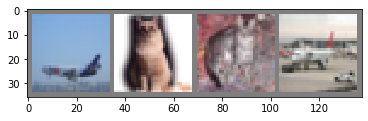

In [82]:
import matplotlib.pyplot as plt
import numpy as np

def imshow(img):
    img = img / 2 + 0.5 # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
               
# 학습용 이미지를 무작위로 가져오기
dataiter = iter(trainloader)
images, labels = dataiter.next()

# 이미지 보여주기
imshow(torchvision.utils.make_grid(images))
# 정답 출력
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))
                         

### 합성곱 신경망 정의

In [83]:
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)
        
    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
    
net = Net()

### 손실함수와 Optimizer 정의
- Cross-Entropy loss and momentum을 갖는 SGD

In [123]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

### 신경망 학습

In [117]:
inputs.shape

torch.Size([4, 3, 32, 32])

In [115]:
outputs.shape

torch.Size([4, 10])

In [116]:
labels.shape

torch.Size([4])

In [130]:
for epoch in range(5):
    
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # 입력을 받은 후
        inputs, labels = data
        
        # Variable로 감싸고
        inputs, labels = Variable(inputs), Variable(labels)
        
        # 변화도 매개변수를 0으로 만든 후
        optimizer.zero_grad()
        
        # 학습 + 역전파 + 최적화
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        # 통계 출력
        running_loss += loss.data
        if i % 6000 == 5999:
            print(f'[{epoch+1}, {i+1}] loss : {running_loss/2000}')
            running_loss = 0.0
            
print('Finished Training')

[1, 6000] loss : 3.5848090648651123
[1, 12000] loss : 3.496103525161743
[2, 6000] loss : 3.2431914806365967
[2, 12000] loss : 3.3067667484283447
[3, 6000] loss : 3.067927837371826
[3, 12000] loss : 3.0855045318603516
[4, 6000] loss : 2.8868117332458496
[4, 12000] loss : 2.9090044498443604
[5, 6000] loss : 2.7293286323547363
[5, 12000] loss : 2.826139211654663
Finished Training


### 시험용 데이터로 신경망 검사

GroundTruth :    cat  ship  ship plane


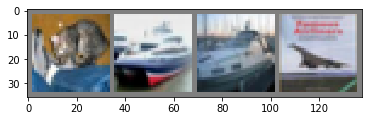

In [131]:
dataiter = iter(testloader)
images, labels = dataiter.next()

# 이미지 출력
imshow(torchvision.utils.make_grid(images))
print('GroundTruth : ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

- 신경망 예측 값 확인

In [132]:
outputs = net(Variable(images))

In [133]:
_, predicted = torch.max(outputs.data, 1)

print('Predictd : ', ' '.join('%5s' % classes[predicted[j]] for j in range(4)))

Predictd :    cat  ship  ship plane


- 전체 데이터 셋에 대한 동작 확인

In [134]:
correct = 0
total = 0
for data in testloader:
    images, labels = data
    outputs = net(Variable(images))
    _, predicted = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum()
    
print(f'Accuract of the network on the 10000 test images : {100 * correct / total}')

Accuract of the network on the 10000 test images : 62


- 어떤 걸 더 잘 분류하고 어떤 것들을 더 못했는지

In [140]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
for data in testloader:
    images, labels = data
    outputs = net(Variable(images))
    _, predicted = torch.max(outputs.data, 1)
    c = (predicted == labels).squeeze()
    for i in range(4):
        label = labels[i]
        class_correct[label] += c[i]
        class_total[label] += 1
        
for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

RuntimeError: "div_cpu" not implemented for 'Bool'

In [138]:
class_correct[i]

tensor(True)

## GPU에서 학습
- Tensor를 GPU로 옮겼던 것 처럼 신경망을 GPU로 옮길 수 있음
- 이렇게 하면 모든 모듈에 대해서 재귀적으로 처리하며 매개변수와 버퍼들을 CUDA tensor로 변환하게 됨

In [141]:
net.cuda()

Net(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

- 모든 단계에서 입력과 정답도 GPU로 보내야 함

In [142]:
inputs, labels = Variable(inputs.cuda()), Variable(labels.cuda())